<a href="https://colab.research.google.com/github/KhanShaheb34/Bangla-Paraphrase-Identification/blob/master/DataAnalysis/SentenceAnalysis/SentenceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

plt.style.use('ggplot')

In [2]:
dataset = pd.read_csv('binodon.csv')[["Sentence1", "Sentence2", "Rounding"]]
dataset = dataset.dropna()
dataset.head()

,Sentence1,Sentence2,Rounding
0,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,আসছে দুই প্রীতিলতা,1.0
1,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,"ভালো লাগছে, আবার ভয় ও লাগছে: তিশা",0.0
3,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,চলচ্চিত্রে তিশা-মনোজ জুটি,0.0
4,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,সিনেমা হল সংস্কারে বিশেষ তহবিল গঠন করা হবে,0.0
5,আসছে দুই প্রীতিলতা,"ভালো লাগছে, আবার ভয় ও লাগছে: তিশা",0.0


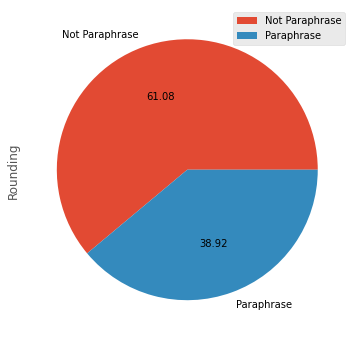

In [3]:
dataset["Rounding"].value_counts().plot.pie(labels=['Not Paraphrase', 'Paraphrase'], autopct='%.2f', figsize=(6, 6), legend=True)

In [8]:
wc1 = [len(re.sub('_|-|!|:| |,', ' ', sent).split()) for sent in dataset['Sentence1']]
wc2 = [len(re.sub('_|-|!|:| |,', ' ', sent).split()) for sent in dataset['Sentence2']]

cc1 = [len(sent) for sent in dataset['Sentence1']]
cc2 = [len(sent) for sent in dataset['Sentence2']]

dataset['WordCount1'] = wc1
dataset['WordCount2'] = wc2
dataset['CharCount1'] = cc1
dataset['CharCount2'] = cc2
dataset.head()

,Sentence1,Sentence2,Rounding,WordCount1,WordCount2,CharCount1,CharCount2
0,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,আসছে দুই প্রীতিলতা,1.0,5,3,34,18
1,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,"ভালো লাগছে, আবার ভয় ও লাগছে: তিশা",0.0,5,7,34,34
3,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,চলচ্চিত্রে তিশা-মনোজ জুটি,0.0,5,4,34,25
4,অবশেষে প্রীতিলতার শুটিং শুরু হচ্ছে,সিনেমা হল সংস্কারে বিশেষ তহবিল গঠন করা হবে,0.0,5,8,34,42
5,আসছে দুই প্রীতিলতা,"ভালো লাগছে, আবার ভয় ও লাগছে: তিশা",0.0,3,7,18,34


In [9]:
dataset.describe()

,Rounding,WordCount1,WordCount2,CharCount1,CharCount2
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,0.389237,7.198999,7.348561,46.891114,47.915519
std,0.487730,2.656111,2.680766,16.899776,17.099942
min,0.000000,2.000000,2.000000,9.000000,9.000000
25%,0.000000,5.000000,5.000000,34.000000,35.000000
50%,0.000000,7.000000,7.000000,44.000000,46.000000
75%,1.000000,9.000000,9.000000,56.000000,58.000000
max,1.000000,16.000000,16.000000,109.000000,106.000000


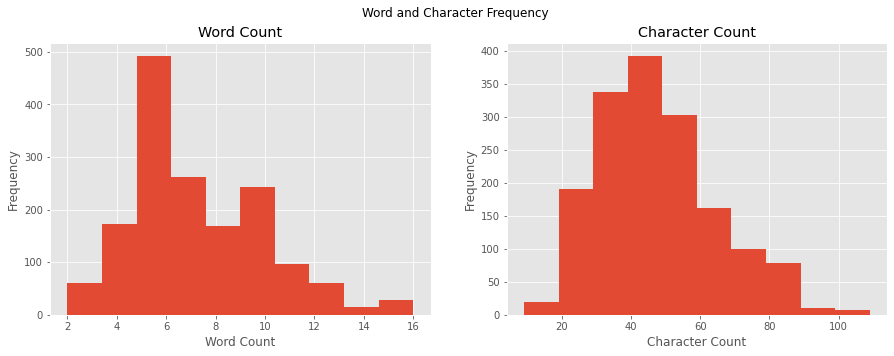

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fig.suptitle('Word and Character Frequency')

ax1.set_title("Word Count")
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')
dataset["WordCount1"].sort_values(ignore_index=True).plot.hist(ax=ax1)
ax2.set_title("Character Count")
ax2.set_xlabel('Character Count')
ax2.set_ylabel('Frequency')
dataset["CharCount1"].sort_values(ignore_index=True).plot.hist(ax=ax2)

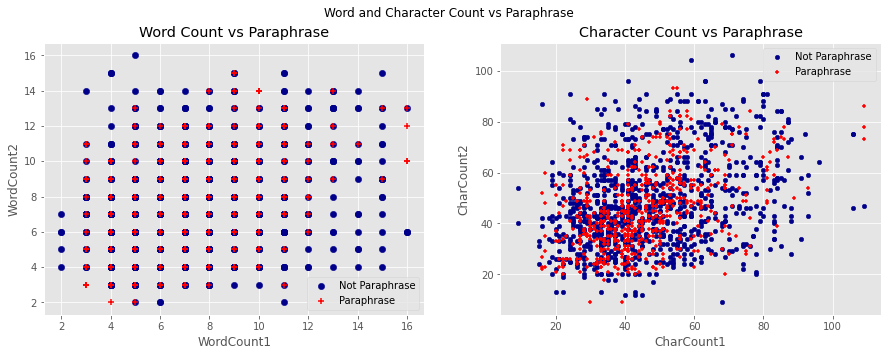

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fig.suptitle('Word and Character Count vs Paraphrase')

ax1.set_title("Word Count vs Paraphrase")
dataset[dataset["Rounding"] == 0].plot.scatter(x='WordCount1', y='WordCount2', color='DarkBlue', s=40, label="Not Paraphrase", ax = ax1)
dataset[dataset["Rounding"] == 1].plot.scatter(x='WordCount1', y='WordCount2', color='r', marker='+', s=40, label="Paraphrase", ax = ax1)

ax2.set_title("Character Count vs Paraphrase")
dataset[dataset["Rounding"] == 0].plot.scatter(x='CharCount1', y='CharCount2', color='DarkBlue', s=20, label="Not Paraphrase", ax = ax2)
dataset[dataset["Rounding"] == 1].plot.scatter(x='CharCount1', y='CharCount2', color='r', marker='+', s=20, label="Paraphrase", ax = ax2)